<a href="https://colab.research.google.com/github/francobiglione/ProteinBiophysics/blob/main/tutorials/Abs_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title **Download and Import Libraries**
!git clone https://github.com/francobiglione/ProteinBiophysics
from ProteinBiophysics import abs_library as abs
import seaborn as sns
import matplotlib.pyplot as plt

Cloning into 'ProteinBiophysics'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 164 (delta 33), reused 0 (delta 0), pack-reused 96
Receiving objects: 100% (164/164), 444.69 KiB | 6.35 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [2]:
#@title **How to define class and import data** { display-mode: "form" }
abs_spectra = abs.abs_spectra('/content/ProteinBiophysics/tutorials/absorbance_spectra_example.csv') #Data from a protein absorbance near UV spectra


# **Absorbance Spectra Class**:  How-to guide

In [3]:
#@title Analysis of an Abs Spectra: Get Attributes { display-mode: "form" }
print('abs_spectra.path: ', abs_spectra.path) #Path of the imported file
print('abs_spectra.name: ', abs_spectra.name) #Name of the file
print('abs_spectra.title: ', abs_spectra.title) #Title inside the file
print('abs_spectra.wv_min:', abs_spectra.wv_min) #Minumum registered Wavelength in raw data
print('abs_spectra.wv_max:', abs_spectra.wv_max) #maximum registered Wavelength in raw data
print('abs_spectra.wv_delta:', abs_spectra.wv_delta) #Data pitch interval
print('\nabs_spectra.wavelength_raw:\n\n', abs_spectra.wavelength) #Raw Wavelengths 
print('\nabs_spectra.ellipticity_raw:\n\n', abs_spectra.abs_raw) #Raw ellipticity

print('\n\nabs_spectra.info: ') #Information at the beginning of the file
display(abs_spectra.info)
print('\n\nabs_spectra.metadata: ') #Information at the end of the file
display(abs_spectra.metadata)

abs_spectra.path:  /content/ProteinBiophysics/tutorials/absorbance_spectra_example.csv
abs_spectra.name:  absorbance_spectra_example
abs_spectra.title:  221004_absorbance_example
abs_spectra.wv_min: 250.0
abs_spectra.wv_max: 320.0
abs_spectra.wv_delta: 0.5

abs_spectra.wavelength_raw:

 0      320.0
1      319.5
2      319.0
3      318.5
4      318.0
       ...  
136    252.0
137    251.5
138    251.0
139    250.5
140    250.0
Name: Wavelength [nm], Length: 141, dtype: float64

abs_spectra.ellipticity_raw:

 0      0.411157
1      0.411701
2      0.411987
3      0.412551
4      0.413104
         ...   
136    0.615474
137    0.613610
138    0.612412
139    0.612097
140    0.612779
Name: Abs [UA], Length: 141, dtype: float64


abs_spectra.info: 


Information,TITLE,DATA TYPE,ORIGIN,OWNER,DATE,TIME,SPECTROMETER/DATA SYSTEM,LOCALE,RESOLUTION,DELTAX,XUNITS,YUNITS,FIRSTX,LASTX,NPOINTS,FIRSTY,MAXY,MINY,XYDATA
Data,221004_absorbance_example,ULTRAVIOLET SPECTRUM,JASCO,NaN,22/10/04,18:31:51,NaN,3082,NaN,"-0,5",NANOMETERS,ABSORBANCE,"320,0000","250,0000",141,"0,41116","1,08763","0,41116",NaN




abs_spectra.metadata: 


Metadata,Sample name,Comment,User,Division,Company,[Detailed Information],Creation date,Data array type,Horizontal axis,Vertical axis,...,Photometric Mode,Measurement range,Data pitch,Band width(UV/Vis),Response,Scanning speed,Source Change,Light Source,Filter Exchange,Correction
Data,221004_absorbance_example,buffer reaccion,NaN,NaN,IBR,NaN,04/10/2022 18:31,Linear data array,Wavelength [nm],Abs,...,Abs,320 - 250 nm,0.5 nm,1.5 nm,Medium,100 nm/min,330 nm,D2/WI,Step,None


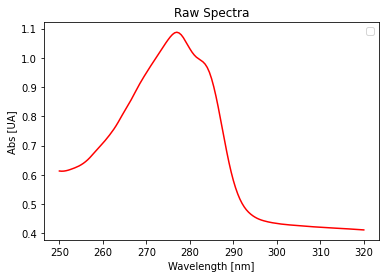

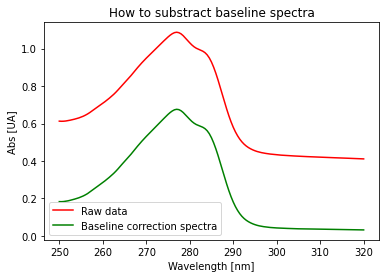

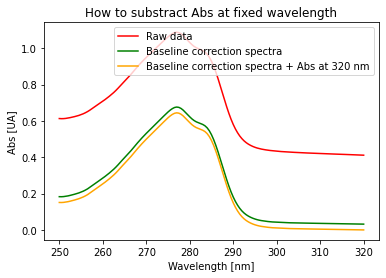

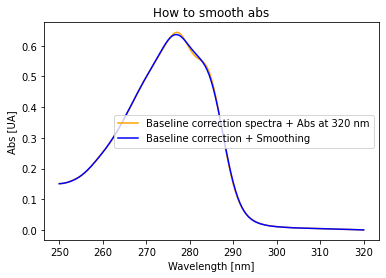

In [4]:
#@title Analysis of an Absorbance Spectra: Apply Methods and plot spectra { display-mode: "form" }

'''How to plot Raw Spectra'''
plt.plot(abs_spectra.wavelength,abs_spectra.abs_raw,c='red')
plt.ylabel(abs_spectra.abs_raw.name)
plt.xlabel(abs_spectra.wavelength.name)
plt.title('Raw Spectra')
plt.legend()
plt.show()


'''How to substract baseline spectra: Blank'''
abs_spectra.baseline(baseline_path = '/content/ProteinBiophysics/tutorials/absorbance_spectra_example_buffer.csv') #Substracts baseline defining only the path of the corresponding blank spectrum file
plt.plot(abs_spectra.wavelength,abs_spectra.abs_raw,c='red',label='Raw data')
plt.plot(abs_spectra.wavelength,abs_spectra.abs,c='green',label='Baseline correction spectra')
plt.ylabel(abs_spectra.abs_raw.name)
plt.xlabel(abs_spectra.wavelength.name)
plt.title('How to substract baseline spectra')
plt.legend()
plt.show()


'''How to substract baseline spectra: Absorbance at fixed wavelength'''

plt.plot(abs_spectra.wavelength,abs_spectra.abs_raw,c='red',label='Raw data')
plt.plot(abs_spectra.wavelength,abs_spectra.abs,c='green',label='Baseline correction spectra ')
abs_spectra.baseline(nm = 320) #Substracts baseline defining only the path of the corresponding blank spectrum file
plt.plot(abs_spectra.wavelength,abs_spectra.abs,c='Orange',label='Baseline correction spectra + Abs at 320 nm')
plt.ylabel(abs_spectra.abs_raw.name)
plt.xlabel(abs_spectra.wavelength.name)
plt.title('How to substract Abs at fixed wavelength')
plt.legend()
plt.show()



'''How to smooth spectra:'''
abs_spectra.smooth(19,3) #Smooth using Savitzky-Golay filter, define window size and polynomial order.
plt.plot(abs_spectra.wavelength,abs_spectra.abs,c='Orange',label='Baseline correction spectra + Abs at 320 nm')
plt.plot(abs_spectra.wavelength,abs_spectra.smoothed,c='Blue',label='Baseline correction + Smoothing')
plt.ylabel(abs_spectra.abs_raw.name)
plt.xlabel(abs_spectra.wavelength.name)
plt.legend()
plt.title('How to smooth abs')
plt.show()



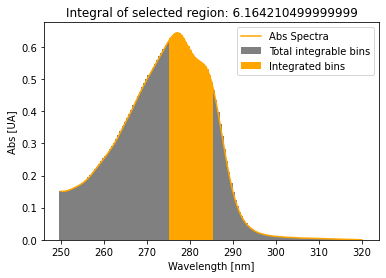

In [5]:
#@title Analysis of an Absorbance Spectra: Integrate spectrum region { display-mode: "form" }


'''How to integrate region using Riemann's sum approximation'''

wv_limit_lower = 275
wv_limit_upper = 285
abs_spectra.integrate(wv_limit_lower,wv_limit_upper) #Define limits of the integral region

upper_idx = abs_spectra.wavelength[abs_spectra.wavelength == wv_limit_lower].index[0]
lower_idx = abs_spectra.wavelength[abs_spectra.wavelength == wv_limit_upper].index[0]
plt.plot(abs_spectra.wavelength,abs_spectra.abs,c='orange', label = 'Abs Spectra')
plt.bar(abs_spectra.wavelength,abs_spectra.abs,color = 'gray', label = 'Total integrable bins')
plt.bar(abs_spectra.wavelength.iloc[lower_idx:upper_idx],abs_spectra.abs.iloc[lower_idx:upper_idx],color = 'orange', label = 'Integrated bins')
plt.ylabel(abs_spectra.abs.name)
plt.xlabel(abs_spectra.wavelength.name)
plt.title(f'Integral of selected region: {abs_spectra.integral}')
plt.legend()

In [6]:
#@title Analysis of an Absorbance Spectra: Calculate Concentration { display-mode: "form" }
molar_ext_coeff  = 6085 #M^-1.cm^-1
pathlength = 1 #cm
wv = 280
abs_spectra.concentration_calc(wv, molar_ext_coeff, pathlength)
print('Compound concentrarion:\t'+f'{abs_spectra.concentration} '+'M'+'\t // \t'+f'{abs_spectra.concentration*1000000} '+'uM')

Compound concentrarion:	9.70427280197206e-05 M	 // 	97.0427280197206 uM
